In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
df = pd.read_csv('game data.csv')

In [3]:
df.head()

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


In [4]:
df = df.drop('Days', axis=1)

In [5]:
df

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes
5,Sunny,Warm,Outdoor,No
6,Cloudy,Warm,Indoor,No
7,Sunny,Warm,Indoor,No


In [12]:
x = df.drop('Wear Jacket?', axis=1)

In [13]:
y = df[['Wear Jacket?']]

In [15]:
x.head()

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor


In [11]:
y.head()

,Wear Jacket?
0,No
1,Yes
2,No
3,Yes
4,Yes


# preprocessing

In [23]:
from pandas.core.dtypes.common import is_numeric_dtype

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
x.columns

Index(['Outlook', 'Temprature', 'Routine'], dtype='object')

In [27]:
for col in x.columns:
    if is_numeric_dtype(x[col]):
        continue
    else:
        x[col]=LabelEncoder().fit_transform(x[col])
            

In [28]:
x.head()

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


In [29]:
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


 outlook (sunny->1, cloudy->0) <br>
temperature (cold->0, warm ->1) <br>
routine (indoor->0, outdoor->1) <br>

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
clf = DecisionTreeClassifier()

In [32]:
clf.fit(x,y)

DecisionTreeClassifier()

In [33]:
clf.predict([[1,0,0]])

array(['No'], dtype=object)

In [34]:
clf.predict([[1,0,1]])

array(['Yes'], dtype=object)

[Text(200.88000000000002, 190.26, 'X[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(133.92000000000002, 135.9, 'X[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(66.96000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(200.88000000000002, 81.53999999999999, 'X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(133.92000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(267.84000000000003, 135.9, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

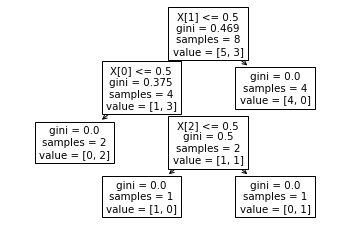

In [40]:
tree.plot_tree(clf)

[Text(200.88000000000002, 190.26, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(133.92000000000002, 135.9, 'Outlook <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(66.96000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(200.88000000000002, 81.53999999999999, 'Routine <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(133.92000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(267.84000000000003, 135.9, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

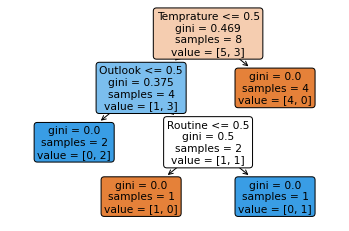

In [39]:
tree.plot_tree(clf, feature_names=x.columns, rounded=True, filled=True)